In [1]:
import pandas as pd
import numpy as np

# Importing
import glob
import os

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

# Missing Values
import missingno as msno

# Stats
from scipy.stats import skew, kurtosis

from IPython.display import Image

# Helper Functions

In [175]:
import matplotlib.dates as mdates
import re

def clean_str(string):
    '''
    Removes special characters and double spaces from a string, preserving single spaces between words.
    
    Args:
        string (str): the dirty string to clean.
    
    Returns:
        cleaned (str)
    '''
    non_word_digit = re.compile(r"[^a-zA-Z0-9 ]+") # Leaving spaces, removing all non letter/digit (add \- to leave - char as well)
    multiple_spaces = re.compile(r"( {1,})") # Catching all repeated spaces
    start_end_spaces = re.compile(r"(\A\s|\s\Z)") # Removing spaces at start/end
    step_1 = re.sub(non_word_digit, "", string)
    step_2 = re.sub(multiple_spaces, " ", step_1)
    cleaned = re.sub(start_end_spaces, "", step_2)
    
    return cleaned

def plot_ts(timeseries, col=0, interval=7, rotation=0):
    '''
    Args:
        timeries (pandas.core.frame.DataFrame): Pandas df with index Date
        interval '''
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.plot(timeseries.index, timeseries.iloc[:,col], linestyle='-', marker='')
    
    # Formatting xtick time labels
    days = mdates.DayLocator(interval=interval)
    days_format = mdates.DateFormatter('%b-%d')
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_format)
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    
    ax.set_xlabel("Time", fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    plt.title(f"{timeseries.iloc[:,col].name}", fontweight='bold')
    return plt.show()

### Testing Stationarity

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.dates as mdates


def adf_test(timeseries):
    '''
    Performs the ADF (Augmented Dickey Fuller) Test on a timeseries.
    Null-Hp: Presence of unit root (the timeseries is non-stationary)
    '''
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print (dfoutput)

def kpss_test(timeseries):
    '''
    Performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test on a timeseries.
    Null-Hp: The timeseries is trend stationary.
    '''
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print (kpss_output)


def plot_ts(timeseries, col=0, interval=7, rotation=0):
    '''
    Args:
        timeries (pandas.core.frame.DataFrame): Pandas df with index Date
        interval '''
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.plot(timeseries.index, timeseries.iloc[:,col], linestyle='-', marker='')
    
    # Formatting xtick time labels
    days = mdates.DayLocator(interval=interval)
    days_format = mdates.DateFormatter('%b-%d')
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_format)
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    
    ax.set_xlabel("Time", fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    plt.title(f"{timeseries.iloc[:,col].name}", fontweight='bold')
    return plt.show()
    
def plot_rolling(timeseries, col=0, interval=7, rotation=0):
    '''
    Args:
        timeries (pandas.core.frame.DataFrame): Pandas df with index Date
        interval
    '''
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.plot(timeseries.index, timeseries.iloc[:,col], linestyle='-', marker='', label='Original')
    
    # Calculating rolling stats
    rollmean = timeseries.rolling(window=5).mean()
    rollstd = timeseries.rolling(window=5).std()
    
    ax.plot(rollmean, linestyle='-', marker='', color='black', label='Rolling Mean')
    ax.plot(rollstd, linestyle='-', marker='', color='red', label='Rolling Std')
    
    # Formatting xtick time labels
    days = mdates.DayLocator(interval=interval)
    days_format = mdates.DateFormatter('%b-%d')
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_format)
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    
    ax.set_xlabel("Time", fontweight='bold')
    ax.set_ylabel("Value", fontweight='bold')
    plt.title(f"{timeseries.iloc[:,col].name}", fontweight='bold')
    plt.legend()
    return plt.show()

def describe_num(df, col=None):
    
    '''Takes as input a dataframe and the name of the column you want to describe.
    Returns the unique values, eventual missing values count,
    the absolute frequencies and the relative frequencies of unique values.
    
    Args:
        df (pandas.core.frame.DataFrame): Pandas DataFrame object.
        col (str): Name of the column to describe.'''
    
    if col==None:
        col = [*df.columns]
    elif type(col) == str:
        col = [col]
    elif type(col) != list:
        print("Invalid Input!")
    index = ['Min', 'Q1', 'Mean', 'Std', 'Median', 'Q3', 'Max']
    stats = pd.DataFrame(columns = col, index = index)
    for i in col:
        stats.loc[index[0], i] = df[i].min()
        stats.loc[index[1], i] = df[i].quantile(q=0.25)
        stats.loc[index[2], i] = df[i].mean()
        stats.loc[index[3], i] = df[i].std()
        stats.loc[index[4], i] = df[i].median()
        stats.loc[index[5], i] = df[i].quantile(q=0.75)
        stats.loc[index[6], i] = df[i].max()
    return stats


def plot_num(df):
    sns.set_style("dark")
    for j in range(int(np.ceil(df.shape[1]/3))):
        fig, axes = plt.subplots(2, 3, sharex='col', figsize=(20, 5), dpi=100, gridspec_kw={"height_ratios": (.2, .8)})
        for i in range(3):
            k = 3*j + i
            if k < df.shape[1]:
                sns.boxplot(df.iloc[:,k], ax=axes[0, i], showmeans=True, meanprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='orange'))
                skew_kurt = f"Skewness: {skew(df.iloc[:,k]):0.3f}, Kurtosis: {kurtosis(df.iloc[:,k]):0.3f}"
                axes[0, i].set_title(f"{df.columns[k]}\n", fontweight='bold', fontsize=14)
                axes[0, i].set_xlabel(f'{skew_kurt}', fontsize=12)
                
                axes[0, i].xaxis.set_label_position('top') 
                axes[0, i].set_ylabel('')
                
                # Calculate number of obs per group & median to position labels
                
                mean = df.iloc[:,k].mean()
                # axes[0, i].axvline(x = mean, color="red")
                
                try:
                    sns.distplot(df.iloc[:,k],
                                 kde_kws={"color": "black", "lw": 2},
                                 hist_kws={"histtype": "bar", "linewidth": 1, "alpha": 0.4},
                                 ax=axes[1, i])
                except RuntimeError as error:
                    print(f"{df.columns[k]} caused an {error}")
                axes[1, i].set_title('')
                axes[1, i].set_xlabel(f'Values for {df.columns[k]}', fontweight='bold')
                axes[1, i].set_ylabel('Density', fontweight='bold')
                plt.subplots_adjust(hspace=0.05)
            else:
                break
        plt.show()
        
def describe_cat(df, col):
    
    '''Takes as input a dataframe and the name of the column you want to describe.
    Returns the unique values, eventual missing values count,
    the absolute frequencies and the relative frequencies of unique values.
    
    Args:
        df (pandas.core.frame.DataFrame): Pandas DataFrame object.
        col (str): Name of the column to describe.'''
    
    # Number, count and percentage of unique values in the column
    print(f'{col} - {df[col].nunique()} unique values.')
    count = df[col].value_counts(sort=True, dropna=True)
    perc = df[col].value_counts(normalize=True, sort=True, ascending=False, dropna=True)*100
    d = pd.concat([perc, count], axis=1, keys=['Percentage %', 'Count'])
    
    # dtype of the column
    print(f"dtype: {df[col].dtype}.")
    
    # Number of missing values, if any
    missing_count = df[col].isnull().sum()
    if missing_count != 0:
        total = len(df[col])
        missing_perc = (missing_count/total)*100
     
        print(f'! Missing values: perc - {missing_perc:0.3f}% count - {missing_count}')
    else:
        print(f'No missing values.\n')
    return d

def n_outl(df, col_name, method='norm', n_std=2, detect=False):
    '''
    df (pandas.core.frame.DataFrame): Dataframe.
    col_name (str): Numeric column to be consider.
    method (str, optional): Accepts 'IQR' for interquartile range, defaults to Normal Distribution.
    n_std (int, optional): Number of standard deviations to consider, defaults to 2.
    '''
    if method.lower()=='norm':
        mean = df[col_name].mean()
        sd = df[col_name].std()
        
        # keep only the ones that are within +x to -x standard deviations in the column
        boolean_mask = (np.abs(df[col_name].values - mean) > n_std*sd)
        

    elif method.lower()=='iqr':
    
        q1 = np.quantile(df[col_name], 0.25)
        q3 = np.quantile(df[col_name], 0.75)
        iqr = q3-q1
        th1 = q1 - 1.5*iqr
        th3 = q3 + 1.5*iqr

        boolean_mask = ( (df[col_name] > th3) | (df[col_name] < th1) ) 
    
    
    if detect:
        df_outliers = df[boolean_mask]
        return df_outliers

    outliers = len(df[boolean_mask])
    return outliers

def num2quantile(df, col, num1, num2='<', ID='ID', verbose=False):
    '''
    Returns the corresponding quantile of a numeric value of a column.
    '''
    df = df.rename_axis('ID').reset_index()
    if type(num2) == str:
        if num2 == '<':
            quant = df.loc[df[col] < num1, ID].count() / df.shape[0] * 100
            if verbose:
                return print(f'{quant:0.2f}% of the values in column {col} are below {num1}. {df.loc[df[col] > num1, ID].count()} values are excluded.')
        elif num2 == '>':
            quant = df.loc[df[col] > num1, ID].count() / df.shape[0] * 100
            if verbose:
                return print(f'{quant:0.2f}% of the values in column {col} are above {num1}.')
    else:
        quant = df.loc[(df[col]>=num1) & (df[col]<num2), ID].count() / df.shape[0] * 100
        if verbose:
                return print(f'{quant:0.2f}% of the values in column {col} are between {num1} and {num2}. Included values: {df.loc[(df[col]>=num1) & (df[col]<num2), ID].count()}')
    
    return quant

## Importing Data

In [3]:
PATH = "C:\\Users\\giuma\\IBM-challenge_predict-future-sales"

# Listing all csv in the directory
files = []
for csv in glob.glob(os.path.join(PATH, 'data', '*.csv')):
    files.append(csv.split("/")[-1])
files

['sales_train.csv',
 'shops.csv',
 'test.csv',
 'item_categories.csv',
 'items.csv',
 'sample_submission.csv']

In [4]:
transactions = pd.read_csv(PATH + "sales_train.csv")
shops = pd.read_csv(PATH + "shops.csv")
item_categories = pd.read_csv(PATH + "item_categories.csv")
items = pd.read_csv(PATH + "items.csv")
submission_ex = pd.read_csv(PATH + "sample_submission.csv")
test = pd.read_csv(PATH + "test.csv")

In [5]:
print(transactions.shape)
transactions.tail()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [6]:
print(shops.shape)
shops.tail()

(60, 2)


,shop_name,shop_id
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


In [7]:
print(item_categories.shape)
item_categories.tail()

(84, 2)


,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [8]:
print(items.shape)
items.tail()

(22170, 3)


,item_name,item_id,item_category_id
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


In [9]:
print(submission_ex.shape)
submission_ex.tail()

(214200, 2)


,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


In [10]:
print(test.shape)
test.tail()

(214200, 3)


,ID,shop_id,item_id
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


# Data Cleaning

#### Transactions

In [11]:
transactions.query('item_cnt_day < 0')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


Negative values for item_cnt_day may indicate a returned item. 
**Dropping** them and checking if anything from the test dataset was dropped.

In [12]:
only_returns = set(transactions['item_id']) - set(transactions.query('item_cnt_day > 0')['item_id'])
only_returns

{11871, 13474, 18062}

These items have only been returned without being purchased (in the dataset available).

In [13]:
set(test['item_id'].unique()) & only_returns

set()

In [14]:
transactions = transactions.query('item_cnt_day > 0')

#### Shops

In [15]:
## the last part of the shop name indicates the City
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
## correct the names that are mispelt
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops.head(5)

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [16]:
city_eng = ['Yakutsk', 'Adygea', 'Balashikha', 'Volzhsky', 'Vologda', 'Voronezh', 'Visiting',
            'Zhukovsky', 'Online Store', 'Kazan', 'Kaluga', 'Kolomna', 'Krasnoyarsk', 'Kursk',
            'Moscow', 'Mytishchi', 'N. Novgorod', 'Novosibirsk', 'Omsk', 'RostovNaDonu', 'St. Petersburg',
            'Samara', 'Sergiev Posad', 'Surgut', 'Tomsk', 'Tyumen', 'Ufa', 'Khimki', 'Digital', 'Chekhov', 'Yaroslavl']

city_eng_c = [*map(clean_str, city_eng)]
shops['city'].replace(to_replace=[*shops['city'].unique()], value=city_eng_c, inplace=True)

In [17]:
pd.options.display.max_rows = 10

In [18]:
print(item_categories.shape)
item_categories

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [19]:
item_categories['split'] = item_categories['item_category_name'].str.split('-')
item_categories.head()

,item_category_name,item_category_id,split
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]"
1,Аксессуары - PS2,1,"[Аксессуары , PS2]"
2,Аксессуары - PS3,2,"[Аксессуары , PS3]"
3,Аксессуары - PS4,3,"[Аксессуары , PS4]"
4,Аксессуары - PSP,4,"[Аксессуары , PSP]"


In [20]:
item_categories['split'] = item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['split'].map(lambda x: x[0].strip())
item_categories['subtype'] = item_categories['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [21]:
type_eng = ['PC', 'Accessories',' Tickets (Digit) ',' Delivery of goods',
               'Game consoles',' Games', 'Android games',' MAC games', 'PC games',
               ' Payment cards (Cinema, Music, Games) ',' Payment cards', 'Cinema',
               'Books',' Music ',' Gifts', 'Programs',' Office ',' Blank media (spire) ',
               ' Blank media (piece) ' , 'Batteries']

type_eng_c = [*map(clean_str, type_eng)]
item_categories['type'].replace(to_replace=[*item_categories['type'].unique()], value=type_eng_c, inplace=True)

In [22]:
subtype_eng = ['Headsets / Earphones',' PS2 ',' PS3 ',' PS4 ',' PSP ',' PSVita ',' XBOX 360 ',' XBOX ONE ',
               ' Tickets (Digit) ',' Delivery of goods', 'Other ',' Accessories for games ',' Digit ',' Additional editions ',
               ' Collector\'s editions ',' Standard editions ',' Payment cards (Cinema, Music, Games) ',' Live! ',' Live! (Digit) ',
               ' PSN ',' Windows (Digit) ',' Blu ',' DVD ',' Collectible ',' Artbooks, Encyclopedias', 'Audiobooks',' Audiobooks (Digit) ',
               ' Audiobooks 1C ', 'Business literature', 'Comics, manga', 'Computer literature', 'Methodological materials 1C', 'Postcards',
               ' Informative literature ',' Guides', 'Fiction', 'CD of local production', 'CD of corporate production ',' MP3 ',' Vinyl ',
               ' Music video ',' Gift editions', 'Attributes',' Gadgets, robots, sports', 'Soft toys',' Board games', 'Board games (compact)',
               'Postcards, stickers',' Development ',' Sert certificates, services ',' Souvenirs ',' Souvenirs (in bulk) ',' Bags, Albums, Mouse pads ',
               ' Figures ',' 1C: Enterprise 8 ',' MAC (Digit) ',' For home and office ',' For home and office (Digital) ',' Educational ',
               ' Educational (Digital) ',' Office ',' Tickets ',' Blank media (spire) ',' Clean media (piece) ',' Elements nutrition ']

def remove_spaces(string):
    start_end_spaces = re.compile(r"(\A\s|\s\Z)")
    cleaned = re.sub(start_end_spaces, "", string)
    return cleaned

subtype_eng_c = [*map(remove_spaces, subtype_eng)]
item_categories['subtype'].replace(to_replace=[*item_categories['subtype'].unique()], value=subtype_eng_c, inplace=True)

In [23]:
item_categories = item_categories[['item_category_id','type', 'subtype']]
item_categories

,item_category_id,type,subtype
0,0,PC,Headsets / Earphones
1,1,Accessories,PS2
2,2,Accessories,PS3
3,3,Accessories,PS4
4,4,Accessories,PSP
...,...,...,...
79,79,Office,Office
80,80,Office,Tickets
81,81,Blank media spire,Blank media (spire)
82,82,Blank media piece,Clean media (piece)


In [24]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [25]:
items.drop('item_name', axis=1, inplace=True)

In [28]:
train = transactions\
            .merge(items, on='item_id')\
            .merge(shops, on='shop_id')\
            .merge(item_categories, on='item_category_id', suffixes=(False, False))

In [29]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,shop_name,city,type,subtype
0,02.01.2013,0,59,22154,999.0,1.0,37,"Ярославль ТЦ ""Альтаир""",Yaroslavl,Cinema,Blu
1,26.04.2013,3,59,944,150.0,1.0,37,"Ярославль ТЦ ""Альтаир""",Yaroslavl,Cinema,Blu
2,26.06.2013,5,59,944,199.5,1.0,37,"Ярославль ТЦ ""Альтаир""",Yaroslavl,Cinema,Blu
3,20.07.2013,6,59,944,199.5,1.0,37,"Ярославль ТЦ ""Альтаир""",Yaroslavl,Cinema,Blu
4,14.09.2013,8,59,944,299.0,2.0,37,"Ярославль ТЦ ""Альтаир""",Yaroslavl,Cinema,Blu


In [30]:
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
# Only shops that exist in test set.
lk_train = train[train['shop_id'].isin(test_shop_ids)]
# Only items that exist in test set.
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

print('Data set size before leaking:', train.shape[0])
print('Data set size after leaking:', lk_train.shape[0])



Data set size before leaking: 2928493
Data set size after leaking: 1221498


### Data Preparation

In [38]:
train = train.query('item_price > 0')

In [39]:
lk_train.query('item_cnt_day <= 0').sort_values('item_cnt_day', ascending=True).shape[0]

0

In [40]:
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [ ]:
train_monthly['date'] = pd.to_datetime(train_monthly['date'], format='%d.%m.%Y')
train_monthly = train_monthly.sort_values('date')

In [42]:
train_monthly.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
1619166,2013-01-01,0,37,40,16450,399.0,1.0
462129,2013-01-01,0,14,55,1249,299.0,1.0
959582,2013-01-01,0,7,30,5811,199.0,1.0
1594900,2013-01-01,0,42,40,19597,149.0,1.0
333155,2013-01-01,0,46,55,13881,549.0,1.0


In [43]:
train_monthly = train_monthly\
                            .groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)\
                            .agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})

In [44]:
train_monthly.tail()

date_block_num shop_id item_category_id item_id item_price           \
                                                              sum     mean   
599907             33      59               75    5383     4390.0  4390.00   
599908             33      59               79   17717     8025.5   802.55   
599909             33      59               83   22087      357.0   119.00   
599910             33      59               83   22088      238.0   119.00   
599911             33      59               83   22091      179.0   179.00   

       item_cnt_day             
                sum mean count  
599907          1.0  1.0     1  
599908         13.0  1.3    10  
599909          6.0  2.0     3  
599910          2.0  1.0     2  
599911          1.0  1.0     1

In [38]:
[*train_monthly.columns.values][4]

('item_price', 'sum')

In [39]:
' '.join([*train_monthly.columns.values][4])

'item_price sum'

In [45]:
train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'revenue', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']

In [46]:
# train_monthly.columns = [' '.join(col).strip() for col in train_monthly.columns.values]

In [47]:
train_monthly.head()

,date_block_num,shop_id,item_category_id,item_id,revenue,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,2,5572,10730.0,1532.857143,9.0,1.285714,7
1,0,2,2,5643,2390.0,2390.000000,1.0,1.000000,1
2,0,2,5,5583,1188.3,594.150000,2.0,1.000000,2
3,0,2,6,7893,5970.0,1990.000000,3.0,1.000000,3
4,0,2,6,7894,1490.0,1490.000000,1.0,1.000000,1


## Which Category accounts for the most revenue?

In [263]:
category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['revenue'].sum()/train_monthly.revenue.sum()

item_sum = train_monthly.groupby(['month'], as_index=False)['item_cnt'].sum()

shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()

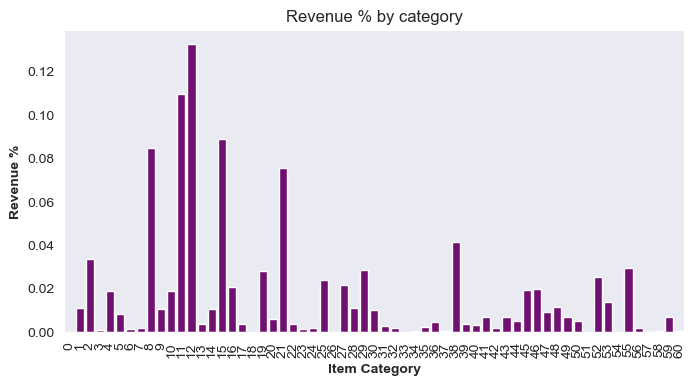

In [257]:
from matplotlib.ticker import FormatStrFormatter

sns.set_style('dark')
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.barplot(x="item_category_id", y="revenue", data=category_sum, color='purple').set_title("Revenue % by category")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Item Category", fontweight='bold')
ax.set_ylabel("Revenue %", fontweight='bold')
plt.show()

# Item sales by month of the year

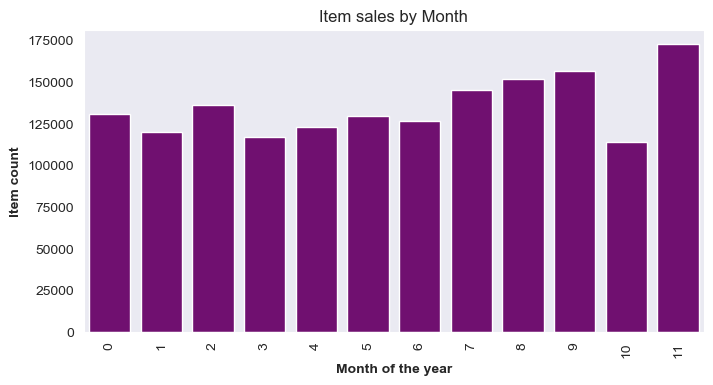

In [262]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.barplot(x="month", y="item_cnt", data=item_sum, color='purple').set_title("Item sales by Month")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Month of the year", fontweight='bold')
ax.set_ylabel("Item count", fontweight='bold')
plt.show()

# Which Shop accounts for the most revenue?

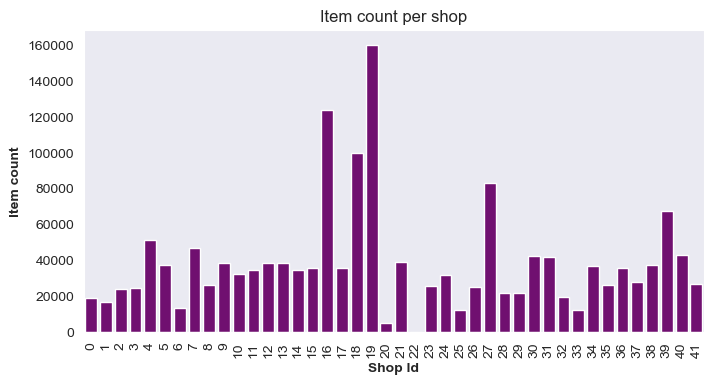

In [265]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.barplot(x="shop_id", y="item_cnt", data=shop_sum, color='purple').set_title("Item count per shop")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Shop Id", fontweight='bold')
ax.set_ylabel("Item count", fontweight='bold')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.barplot(x="item_category_id", y="revenue", data=category_sum, color='purple').set_title("Monthly revenue")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Item Category", fontweight='bold')
ax.set_ylabel("Revenue %", fontweight='bold')
plt.show()

In [48]:
shop_ids = train_monthly['shop_id'].unique()
item_ids = train_monthly['item_id'].unique()
empty_df = []
for i in range(34):
    for shop in shop_ids:
        for item in item_ids:
            empty_df.append([i, shop, item])
    
empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

In [52]:
print(f"Shape of train_monthly: {train_monthly.shape}\nShape of empty_df: {empty_df.shape}")

Shape of train_monthly: (599912, 9)
Shape of empty_df: (6734448, 3)


In [53]:
train_monthly_merged = pd.merge(empty_df, train_monthly, on=['date_block_num','shop_id','item_id'], how='left')

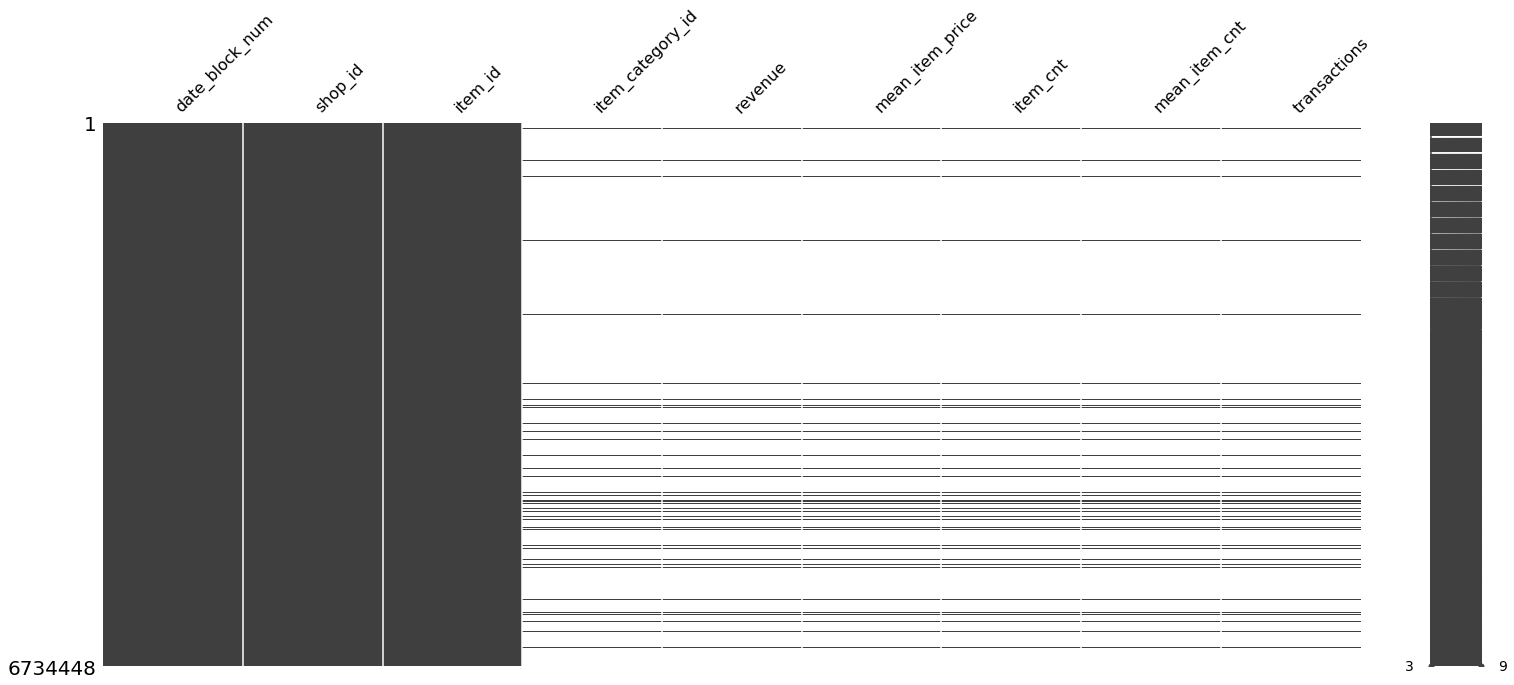

In [54]:
import missingno as msno
msno.matrix(train_monthly_merged)
plt.show()

In [55]:
train_monthly = train_monthly_merged.fillna(0)

In [56]:
### Very sparse data
mask = train_monthly['item_cnt'] == 0
non_zero = train_monthly[~mask]
print(f"There are {train_monthly.shape[0] - non_zero.shape[0]} null transactions, or {((train_monthly.shape[0] - non_zero.shape[0])/train_monthly.shape[0])*100:0.2f} %")

There are 6134536 null transactions, or 91.09 %


### Feature Engineering

- Year and month

In [57]:
train_monthly['year'] = train_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
train_monthly['month'] = train_monthly['date_block_num'].apply(lambda x: (x % 12))

- Item price

In [58]:
train_monthly['item_price'] = train_monthly['revenue'] / train_monthly['item_cnt']

In [59]:
train_monthly['item_price'].replace(np.NaN, 0, inplace=True)

- Lag features

In [60]:
lags = [1, 2, 3, 4, 5, 6]

def lag_feature(df_in, lags_list, col, group):
    """
    Args:
        df
        lags (list):
        col (str): variable to be shifted
        group (list): 
    """
    df = df_in.copy()
    for lag in lags_list:
        df[f'{col}_lag{str(lag)}'] = df.groupby(group)[col].shift(lag).fillna(0)
    return df

In [61]:
train_monthly = lag_feature(train_monthly, lags, 'item_cnt', ['date_block_num', 'shop_id', 'item_id'])

- Trend features

In [62]:
def calculate_trend(df_in, lags_list, columns, group_var, replace_value = True, verbose=False):
    
    '''This function computes the Trend of one or more variables in the input dataset, grouping
    by another variable, and adds them to the dataset which is returned. 
    The Trend is computed as: 100 * (X(t)-X(t-n))/X(t-n), with n=1,...,N
    
    Inputs:
    df_in (obj): DataFrame object, representing the input dataset
    lag_list (list of int, default=1): number of lags to apply to the variables of interest.
    columns (list of str, default=['Confirmed', 'Deaths','Recovered']): names of the variables on which the function is applied.
    group_var
    replace_value (bool, default=True): if True, replace +-inf and NaN created when calculating the ratio.
    verbose (bool, default=False): if True, the function prints the first 30 rows of the output dataset
    
    Outputs:
    df (obj)

    '''
    # N = lag
    # X_trendN = 100 * [X(t)-X(t-N)]/X(t-N)
    
    df = df_in.copy()
    if isinstance(columns, list) == False:
        columns = [columns]

    for column in columns:
        for lag in lags_list:

            df[f'{column}_trend{lag}'] = 100 * (df.groupby(group_var)[column].shift(0) - \
                                                df.groupby(group_var)[column].shift(lag)) / \
                                                df.groupby(group_var)[column].shift(lag)
    
    if replace_value:
        df.replace([np.inf, -np.inf], 0, inplace=True) # generated by n/0
        df.fillna(0, inplace=True)                     # generated by 0/0
    
    if verbose: print(df.iloc[:30,:])
    return df

In [63]:
train_monthly = calculate_trend(train_monthly, lags, 'item_cnt', ['date_block_num', 'shop_id', 'item_id'])

In [64]:
print(train_monthly.shape)
train_monthly.tail()

(6734448, 24)


,date_block_num,shop_id,item_id,item_category_id,revenue,mean_item_price,item_cnt,mean_item_cnt,transactions,year,...,item_cnt_lag3,item_cnt_lag4,item_cnt_lag5,item_cnt_lag6,item_cnt_trend1,item_cnt_trend2,item_cnt_trend3,item_cnt_trend4,item_cnt_trend5,item_cnt_trend6
6734443,33,36,9103,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734444,33,36,9107,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734445,33,36,5704,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734446,33,36,12733,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6734447,33,36,15925,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
train_monthly.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions', 'year',
       'month', 'item_price', 'item_cnt_lag1', 'item_cnt_lag2',
       'item_cnt_lag3', 'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6',
       'item_cnt_trend1', 'item_cnt_trend2', 'item_cnt_trend3',
       'item_cnt_trend4', 'item_cnt_trend5', 'item_cnt_trend6'],
      dtype='object')

### Split train / validation

- **Train set:** Considering only the date_block_num >= 6 and < 28 because we used a 6 months window to generate features and as such the first 6 months don't have these features. 
- **Validation set:** date_block_num >= 28 and < 33, leaving out last month as test.
- **Test set:** date_block_num == 33

In [110]:
train = train_monthly.query('date_block_num >= 6 and date_block_num < 28')
validation = train_monthly.query('date_block_num >= 28 and date_block_num < 33')
test = train_monthly.query('date_block_num == 33')

train = train.dropna(subset=['item_cnt'])
validation = validation.dropna(subset=['item_cnt'])

train = train.dropna()
validation = validation.dropna()

print(f"Train set records: {train.shape[0]}")
print(f"Validation set records: {validation.shape[0]}")
print(f"Test set records: {test.shape[0]}")
#print(f"Train set records: %s (%.f%% of complete data) % (train.shape[0], ((train.shape[0]/train_monthly.shape[0])*100)))"
#print(fValidation set records: %s (%.f%% of complete data) % (validation.shape[0], ((validation.shape[0]/train_monthly.shape[0])*100)))


Train set records: 4357584
Validation set records: 990360
Test set records: 198072


In [82]:
# Shop mean encoding.
gp_shop_mean = train.groupby(['shop_id']).agg({'item_cnt': ['mean']})
gp_shop_mean.columns = ['shop_mean']
gp_shop_mean.reset_index(inplace=True)
# Item mean encoding.
gp_item_mean = train.groupby(['item_id']).agg({'item_cnt': ['mean']})
gp_item_mean.columns = ['item_mean']
gp_item_mean.reset_index(inplace=True)
# Shop with item mean encoding.
gp_shop_item_mean = train.groupby(['shop_id', 'item_id']).agg({'item_cnt': ['mean']})
gp_shop_item_mean.columns = ['shop_item_mean']
gp_shop_item_mean.reset_index(inplace=True)
# Year mean encoding.
gp_year_mean = train.groupby(['year']).agg({'item_cnt': ['mean']})
gp_year_mean.columns = ['year_mean']
gp_year_mean.reset_index(inplace=True)
# Month mean encoding.
gp_month_mean = train.groupby(['month']).agg({'item_cnt': ['mean']})
gp_month_mean.columns = ['month_mean']
gp_month_mean.reset_index(inplace=True)

# Minimum and Maxium item_price
min_max_price = train.groupby(['item_id']).agg({'item_price':[np.min, np.max]})
min_max_price.columns = ['min_item_price', 'max_item_price']

In [ ]:
shops = shops.drop('shop_name', axis=1)

In [101]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

shops['city'] = encoder.fit_transform(shops['city'])
shops

,shop_id,city
0,0,28
1,1,28
2,2,0
3,3,1
4,4,26
...,...,...
55,55,3
56,56,2
57,57,28
58,58,28


In [103]:
item_categories['type'] = encoder.fit_transform(item_categories['type'])
item_categories['subtype'] = encoder.fit_transform(item_categories['subtype'])
item_categories

/Users/giacomomiolo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/giacomomiolo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,item_category_id,type,subtype
0,0,14,35
1,1,0,45
2,2,0,46
3,3,0,47
4,4,0,49
...,...,...,...
79,79,13,43
80,80,13,59
81,81,4,9
82,82,3,16


In [111]:
# Add meand encoding features to train set.
train = pd.merge(train, gp_shop_mean, on=['shop_id'], how='left')
train = pd.merge(train, gp_item_mean, on=['item_id'], how='left')
train = pd.merge(train, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
train = pd.merge(train, gp_year_mean, on=['year'], how='left')
train = pd.merge(train, gp_month_mean, on=['month'], how='left')
train = pd.merge(train, min_max_price, on=['item_id'], how='left')


# Adding encoded categorical features
train = pd.merge(train, shops, on='shop_id', how='left')
train = pd.merge(train, item_categories, on='item_category_id', how='left')

# Adding delta features
train['delta_from_min'] = train['item_price'] - train['min_item_price']
train['delta_from_max'] = train['max_item_price'] - train['item_price']

In [112]:
print(train.shape)
print(train.columns)
train.head()

(4357584, 36)
Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions', 'year',
       'month', 'item_price', 'item_cnt_lag1', 'item_cnt_lag2',
       'item_cnt_lag3', 'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6',
       'item_cnt_trend1', 'item_cnt_trend2', 'item_cnt_trend3',
       'item_cnt_trend4', 'item_cnt_trend5', 'item_cnt_trend6', 'shop_mean',
       'item_mean', 'shop_item_mean', 'year_mean', 'month_mean',
       'min_item_price', 'max_item_price', 'city', 'type', 'subtype',
       'delta_from_min', 'delta_from_max'],
      dtype='object')


,date_block_num,shop_id,item_id,item_category_id,revenue,mean_item_price,item_cnt,mean_item_cnt,transactions,year,...,shop_item_mean,year_mean,month_mean,min_item_price,max_item_price,city,type,subtype,delta_from_min,delta_from_max
0,6,2,5572,2.0,1590.0,1590.000000,1.0,1.0,1.0,2013,...,0.727273,0.218129,0.187399,0.0,2190.0,0,0,46,1590.000000,600.000000
1,6,2,5643,2.0,7170.0,2390.000000,3.0,1.0,3.0,2013,...,1.772727,0.218129,0.187399,0.0,3290.0,0,0,46,2390.000000,900.000000
2,6,2,5583,0.0,0.0,0.000000,0.0,0.0,0.0,2013,...,0.045455,0.218129,0.187399,0.0,699.0,0,14,35,0.000000,699.000000
3,6,2,7893,6.0,10840.0,1806.666667,6.0,1.0,6.0,2013,...,3.363636,0.218129,0.187399,0.0,3090.0,0,0,63,1806.666667,1283.333333
4,6,2,7894,6.0,1490.0,1490.000000,1.0,1.0,1.0,2013,...,1.818182,0.218129,0.187399,0.0,2290.0,0,0,63,1490.000000,800.000000


In [113]:
# Add meand encoding features to validation set.
validation = pd.merge(validation, gp_shop_mean, on=['shop_id'], how='left')
validation = pd.merge(validation, gp_item_mean, on=['item_id'], how='left')
validation = pd.merge(validation, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
validation = pd.merge(validation, gp_year_mean, on=['year'], how='left')
validation = pd.merge(validation, gp_month_mean, on=['month'], how='left')
validation = pd.merge(validation, min_max_price, on=['item_id'], how='left')


# Adding encoded categorical features
validation = pd.merge(validation, shops, on='shop_id', how='left')
validation = pd.merge(validation, item_categories, on='item_category_id', how='left')

# Adding delta features
validation['delta_from_min'] = validation['item_price'] - validation['min_item_price']
validation['delta_from_max'] = validation['max_item_price'] - validation['item_price']

In [114]:
print(validation.shape)
print(validation.columns)
validation.head()

(990360, 36)
Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions', 'year',
       'month', 'item_price', 'item_cnt_lag1', 'item_cnt_lag2',
       'item_cnt_lag3', 'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6',
       'item_cnt_trend1', 'item_cnt_trend2', 'item_cnt_trend3',
       'item_cnt_trend4', 'item_cnt_trend5', 'item_cnt_trend6', 'shop_mean',
       'item_mean', 'shop_item_mean', 'year_mean', 'month_mean',
       'min_item_price', 'max_item_price', 'city', 'type', 'subtype',
       'delta_from_min', 'delta_from_max'],
      dtype='object')


,date_block_num,shop_id,item_id,item_category_id,revenue,mean_item_price,item_cnt,mean_item_cnt,transactions,year,...,shop_item_mean,year_mean,month_mean,min_item_price,max_item_price,city,type,subtype,delta_from_min,delta_from_max
0,28,2,5572,2.0,1590.0,1590.00,1.0,1.0,1.0,2015,...,0.727273,0.298591,0.216265,0.0,2190.0,0,0,46,1590.00,600.00
1,28,2,5643,0.0,0.0,0.00,0.0,0.0,0.0,2015,...,1.772727,0.298591,0.216265,0.0,3290.0,0,14,35,0.00,3290.00
2,28,2,5583,0.0,0.0,0.00,0.0,0.0,0.0,2015,...,0.045455,0.298591,0.216265,0.0,699.0,0,14,35,0.00,699.00
3,28,2,7893,0.0,0.0,0.00,0.0,0.0,0.0,2015,...,3.363636,0.298591,0.216265,0.0,3090.0,0,14,35,0.00,3090.00
4,28,2,7894,6.0,4579.5,2289.75,2.0,1.0,2.0,2015,...,1.818182,0.298591,0.216265,0.0,2290.0,0,0,63,2289.75,0.25


In [115]:
# Add meand encoding features to test set.
test = pd.merge(test, gp_shop_mean, on=['shop_id'], how='left')
test = pd.merge(test, gp_item_mean, on=['item_id'], how='left')
test = pd.merge(test, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
test = pd.merge(test, gp_year_mean, on=['year'], how='left')
test = pd.merge(test, gp_month_mean, on=['month'], how='left')
test = pd.merge(test, min_max_price, on=['item_id'], how='left')


# Adding encoded categorical features
test = pd.merge(test, shops, on='shop_id', how='left')
test = pd.merge(test, item_categories, on='item_category_id', how='left')

# Adding delta features
test['delta_from_min'] = test['item_price'] - test['min_item_price']
test['delta_from_max'] = test['max_item_price'] - test['item_price']

In [116]:
print(test.shape)
print(test.columns)
test.head()

(198072, 36)
Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions', 'year',
       'month', 'item_price', 'item_cnt_lag1', 'item_cnt_lag2',
       'item_cnt_lag3', 'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6',
       'item_cnt_trend1', 'item_cnt_trend2', 'item_cnt_trend3',
       'item_cnt_trend4', 'item_cnt_trend5', 'item_cnt_trend6', 'shop_mean',
       'item_mean', 'shop_item_mean', 'year_mean', 'month_mean',
       'min_item_price', 'max_item_price', 'city', 'type', 'subtype',
       'delta_from_min', 'delta_from_max'],
      dtype='object')


,date_block_num,shop_id,item_id,item_category_id,revenue,mean_item_price,item_cnt,mean_item_cnt,transactions,year,...,shop_item_mean,year_mean,month_mean,min_item_price,max_item_price,city,type,subtype,delta_from_min,delta_from_max
0,33,2,5572,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.727273,0.298591,0.235336,0.0,2190.0,0,14,35,0.0,2190.0
1,33,2,5643,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,1.772727,0.298591,0.235336,0.0,3290.0,0,14,35,0.0,3290.0
2,33,2,5583,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.045455,0.298591,0.235336,0.0,699.0,0,14,35,0.0,699.0
3,33,2,7893,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,3.363636,0.298591,0.235336,0.0,3090.0,0,14,35,0.0,3090.0
4,33,2,7894,6.0,9160.0,2290.0,4.0,1.0,4.0,2015,...,1.818182,0.298591,0.235336,0.0,2290.0,0,0,63,2290.0,0.0


In [117]:
X_train = train.drop(['item_cnt'], axis=1)
y_train = train['item_cnt'].astype(int)
X_validation = validation.drop(['item_cnt'], axis=1)
y_validation = validation['item_cnt'].astype(int)
X_test = test.drop(['item_cnt'], axis=1)
y_test = test['item_cnt'].astype(int)

In [118]:
# Integer features
int_features = ['shop_id', 'item_id', 'year', 'month', 'city', 'type', 'subtype']

X_train[int_features] = X_train[int_features].astype('int32')
X_validation[int_features] = X_validation[int_features].astype('int32')
X_test[int_features] = X_test[int_features].astype('int32')

In [119]:
X_train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'mean_item_cnt', 'transactions', 'year', 'month',
       'item_price', 'item_cnt_lag1', 'item_cnt_lag2', 'item_cnt_lag3',
       'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6', 'item_cnt_trend1',
       'item_cnt_trend2', 'item_cnt_trend3', 'item_cnt_trend4',
       'item_cnt_trend5', 'item_cnt_trend6', 'shop_mean', 'item_mean',
       'shop_item_mean', 'year_mean', 'month_mean', 'min_item_price',
       'max_item_price', 'city', 'type', 'subtype', 'delta_from_min',
       'delta_from_max'],
      dtype='object')

# Models

In [121]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import metrics

import statsmodels.api as sm
import pickle

In [120]:
# Use only part of features on XGBoost.
xgb_features = ['shop_id', 'item_id', 'item_category_id', 'revenue',
       'mean_item_price', 'mean_item_cnt', 'transactions', 'year', 'month',
       'item_price', 'item_cnt_lag1', 'item_cnt_lag2', 'item_cnt_lag3',
       'item_cnt_lag4', 'item_cnt_lag5', 'item_cnt_lag6', 'item_cnt_trend1',
       'item_cnt_trend2', 'item_cnt_trend3', 'item_cnt_trend4',
       'item_cnt_trend5', 'item_cnt_trend6', 'shop_mean', 'item_mean',
       'shop_item_mean', 'year_mean', 'month_mean', 'min_item_price',
       'max_item_price', 'city', 'type', 'subtype', 'delta_from_min',
       'delta_from_max']
xgb_train = X_train[xgb_features]
xgb_val = X_validation[xgb_features]
xgb_test = X_test[xgb_features]

In [122]:
xgb_model = XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)
xgb_model.fit(xgb_train, 
              y_train, 
              eval_metric="rmse", 
              eval_set=[(xgb_train, y_train), (xgb_val, y_validation)], 
              verbose=20, 
              early_stopping_rounds=20)

[20:18:39] WARNING: /usr/local/miniconda/conda-bld/xgboost_1584539872846/work/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:3.30801	validation_1-rmse:2.41496
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[20]	validation_0-rmse:2.57661	validation_1-rmse:2.17205
[40]	validation_0-rmse:2.37396	validation_1-rmse:2.02822
[60]	validation_0-rmse:2.23096	validation_1-rmse:1.99767
[80]	validation_0-rmse:2.10749	validation_1-rmse:2.01791
Stopping. Best iteration:
[65]	validation_0-rmse:2.20268	validation_1-rmse:1.97878



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1000, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

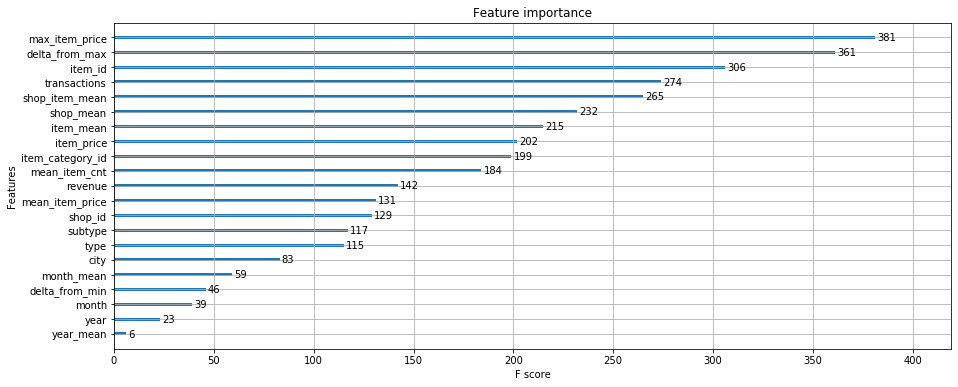

In [212]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

In [124]:
xgb_train_pred = xgb_model.predict(xgb_train)
xgb_val_pred = xgb_model.predict(xgb_val)
xgb_test_pred = xgb_model.predict(xgb_test)

In [136]:
print(f'>>> XGB Model:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, xgb_train_pred))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, xgb_val_pred))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, xgb_test_pred))}\n')

print(f'>>> Baseline, predicting only zeroes:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, np.zeros(y_train.shape[0])))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, np.zeros(y_validation.shape[0])))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, np.zeros(y_test.shape[0])))}\n')

>>> XGB Model:
Train rmse: 2.202859999513043
Validation rmse: 1.9788348384588366
Test rmse: 5.241169610754649

>>> Baseline, predicting only zeroes:
Train rmse: 3.739757193395697
Validation rmse: 2.7787823822547235
Test rmse: 5.780834714988785



In [154]:
# Saving the model
with open(os.path.join(PATH, 'xgb_model.pkl'),'wb') as f:
    pickle.dump(xgb_model, f, protocol=4)

In [195]:
train_monthly.shape

(6734448, 29)

## Random Forest Regressor

In [121]:
rf_features = ['item_cnt',
                'mean_item_cnt',
                'item_price',
                'min_item_price',
                'max_item_price',
                'delta_from_min',
                'delta_from_max', 
                'item_cnt_lag1',
                'item_cnt_lag2',
                'item_cnt_lag3',
                'item_cnt_lag4',
                'item_cnt_lag5',
                'item_cnt_lag6',
                'item_cnt_trend1',
                'item_cnt_trend2',
                'item_cnt_trend3',
                'item_cnt_trend4',
                'item_cnt_trend5',
                'item_cnt_trend6',
                'shop_mean',
                'item_mean',
                'shop_item_mean']

In [103]:
!pip install tscv

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tscv

parameters =  {'max_depth': [20],
              'max_features': [20],
              'min_samples_leaf': [1],
              'min_samples_split': [2],
              'n_estimators': [124],
              'random_state': [42]}
rf_model = RandomForestRegressor()

In [130]:
gs = GridSearchCV(rf_model, parameters, cv=2, scoring = 'neg_root_mean_squared_error', verbose=10, n_jobs=-1, refit=True)

In [163]:
X_train_rf = pd.concat([X_train, X_validation], axis=0)
y_train_rf = pd.concat([y_train, y_validation], axis=0)

In [164]:
gs = gs.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 15.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 15.1min finished


In [165]:
print('***GRIDSEARCH RESULTS***')

print(f"Best score: {gs.best_score_} using {gs.best_params_}")

***GRIDSEARCH RESULTS***
Best score: -0.7835470019258387 using {'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 124, 'random_state': 42}


In [169]:
rf_model_best = gs.best_estimator_

rf_train_pred = rf_model_best.predict(X_train_rf)
rf_test_pred = rf_model_best.predict(X_test)

In [171]:
print(f'>>> Random Forest Model:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train_rf, rf_train_pred))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))}\n')

print(f'>>> Baseline, predicting only zeroes:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train_rf, np.zeros(y_train_rf.shape[0])))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, np.zeros(y_test.shape[0])))}\n')

>>> Random Forest Model:
Train rmse: 0.18189468964263544
Test rmse: 3.5903162519840683

>>> Baseline, predicting only zeroes:
Train rmse: 3.581306417340388
Test rmse: 5.780834714988785



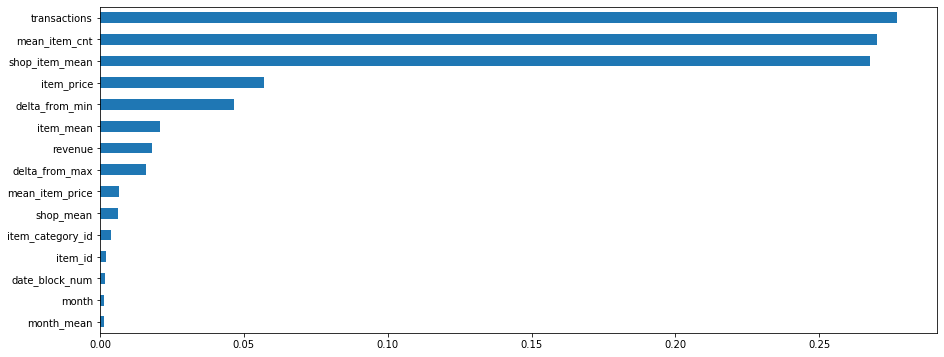

In [198]:
feat_importances = pd.Series(rf_model_best.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values()
feat_importances.iloc[20:].plot(kind='barh')
plt.show()

In [168]:
# Saving the model
with open(os.path.join(PATH, 'rf_model.pkl'),'wb') as f:
    pickle.dump(rf_model_best, f, protocol=4)

## LightGBM

In [200]:
from lightgbm import LGBMRegressor

In [202]:
LightGBM = LGBMRegressor(boosting_type=['goss'], learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=143, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42)

In [205]:
LightGBM.fit(xgb_train, 
             y_train, 
             eval_metric="rmse", 
             eval_set=[(xgb_train, y_train), (xgb_val, y_validation)], 
             verbose=20,
             early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 0.849694	training's l2: 0.72198	valid_1's rmse: 0.620082	valid_1's l2: 0.384502
[40]	training's rmse: 0.55381	training's l2: 0.306706	valid_1's rmse: 0.403361	valid_1's l2: 0.1627
[60]	training's rmse: 0.507834	training's l2: 0.257896	valid_1's rmse: 0.396139	valid_1's l2: 0.156926
[80]	training's rmse: 0.476803	training's l2: 0.227341	valid_1's rmse: 0.388219	valid_1's l2: 0.150714
[100]	training's rmse: 0.44685	training's l2: 0.199675	valid_1's rmse: 0.39184	valid_1's l2: 0.153538
Early stopping, best iteration is:
[90]	training's rmse: 0.465692	training's l2: 0.216869	valid_1's rmse: 0.385207	valid_1's l2: 0.148385


LGBMRegressor(boosting_type=['goss'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=143, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [206]:
lgbm_train_pred = LightGBM.predict(xgb_train)
lgbm_val_pred = LightGBM.predict(xgb_val)
lgbm_test_pred = LightGBM.predict(xgb_test)

In [209]:
print(f'>>> LightGBM Model:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, lgbm_train_pred))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, lgbm_val_pred))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, lgbm_test_pred))}\n')

print(f'>>> Baseline, predicting only zeroes:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, np.zeros(y_train.shape[0])))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, np.zeros(y_validation.shape[0])))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, np.zeros(y_test.shape[0])))}\n')

>>> LightGBM Model:
Train rmse: 0.4656915958985491
Validation rmse: 0.38520715305750286
Test rmse: 3.686694494995098

>>> Baseline, predicting only zeroes:
Train rmse: 3.739757193395697
Validation rmse: 2.7787823822547235
Test rmse: 5.780834714988785



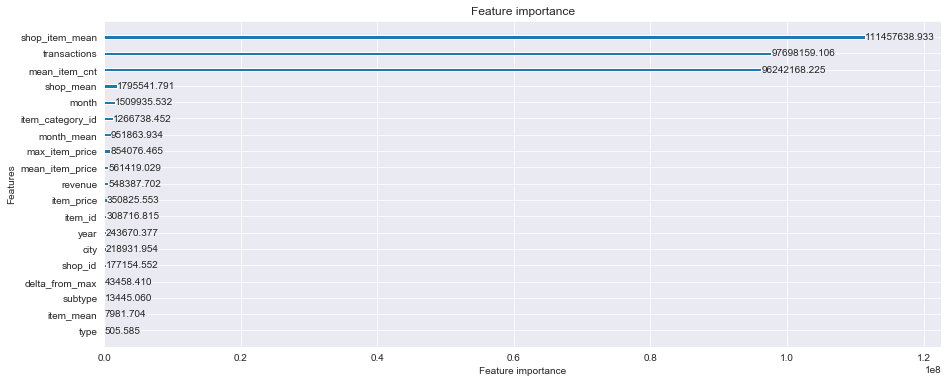

In [255]:
from lightgbm import plot_importance
plot_importance(LightGBM, importance_type='gain')
plt.show()

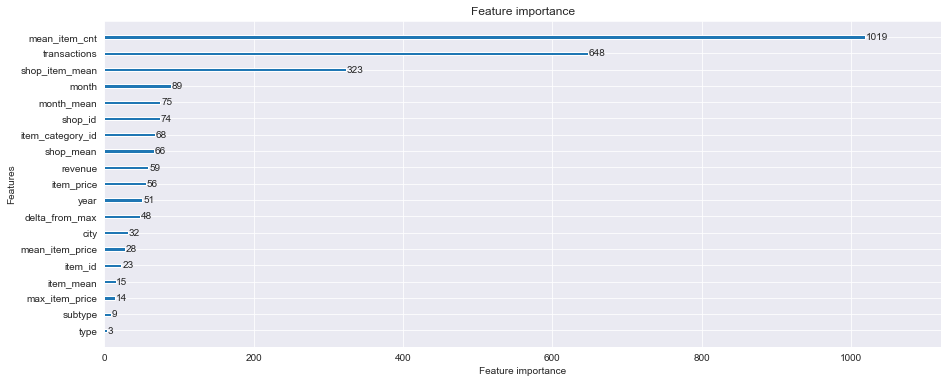

In [256]:
plot_importance(LightGBM, importance_type='split')
plt.show()

In [217]:
# Saving the model
with open('/Users/giuma/Downloads/lightgbm_model.pkl','wb') as f:
    pickle.dump(LightGBM, f, protocol=4)

## Ensemble XGB + RF

In [220]:
from sklearn.ensemble import VotingRegressor
ensemble_reg = VotingRegressor(estimators=[('XGBoost', xgb_model),
                                           ('Random Forest Best', rf_model_best)],
                                          n_jobs=-1)

In [ ]:
ensemble_reg.fit(X_train, y_train)

In [157]:
# Saving the model
with open(os.path.join(PATH, 'ensemble_model.pkl'),'wb') as f:
    pickle.dump(ensemble_reg, f, protocol=4)

In [158]:
ensemble_train_pred = ensemble_reg.predict(X_train)
ensemble_val_pred = ensemble_reg.predict(X_validation)
ensemble_test_pred = ensemble_reg.predict(X_test)

In [160]:
print(f'>>> Ensemble (XGB + RF) Model:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, ensemble_train_pred))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, ensemble_val_pred))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, ensemble_test_pred))}\n')

print(f'>>> Baseline, predicting only zeroes:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, np.zeros(y_train.shape[0])))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, np.zeros(y_validation.shape[0])))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, np.zeros(y_test.shape[0])))}\n')

>>> Ensemble (XGB + RF) Model:
Train rmse: 0.7377053246098604
Validation rmse: 1.0404388369564985
Test rmse: 4.409918774192164

>>> Baseline, predicting only zeroes:
Train rmse: 3.739757193395697
Validation rmse: 2.7787823822547235
Test rmse: 5.780834714988785



## Ensemble XGB + RF + LightGBM

In [222]:
ensemble_reg = VotingRegressor(estimators=[('XGBoost', xgb_model),
                                           ('Random Forest Best', rf_model_best),
                                          ('LightGBM', LightGBM)],
                                          n_jobs=-1,
                                          weights=[0.5,1.1,1])

In [225]:
%%time
ensemble_reg.fit(X_train, y_train)

CPU times: user 803 ms, sys: 2.06 s, total: 2.86 s
Wall time: 2h 32min 4s


VotingRegressor(estimators=[('XGBoost',
                             XGBRegressor(base_score=0.5, booster=None,
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.7, eta=0.3,
                                          gamma=0, gpu_id=-1,
                                          importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=8,
                                          min_child_weight=1000, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500,...
                                           class_weight=None,
                                           colsample_bytree=1.0,
           

In [228]:
# Saving the model
with open('/Users/giuma/Downloads/ensemble_3_model.pkl','wb') as f:
    pickle.dump(ensemble_reg, f, protocol=4)

In [226]:
ensemble_train_pred = ensemble_reg.predict(X_train)
ensemble_val_pred = ensemble_reg.predict(X_validation)
ensemble_test_pred = ensemble_reg.predict(X_test)

In [227]:
print(f'>>> Ensemble (XGB + RF + LightGBM) Model:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, ensemble_train_pred))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, ensemble_val_pred))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, ensemble_test_pred))}\n')

print(f'>>> Baseline, predicting only zeroes:')
print(f'Train rmse: {np.sqrt(metrics.mean_squared_error(y_train, np.zeros(y_train.shape[0])))}')
print(f'Validation rmse: {np.sqrt(metrics.mean_squared_error(y_validation, np.zeros(y_validation.shape[0])))}')
print(f'Test rmse: {np.sqrt(metrics.mean_squared_error(y_test, np.zeros(y_test.shape[0])))}\n')

>>> Ensemble (XGB + RF + LightGBM) Model:
Train rmse: 0.41335926788127675
Validation rmse: 0.5452800192394998
Test rmse: 3.945408385680617

>>> Baseline, predicting only zeroes:
Train rmse: 3.739757193395697
Validation rmse: 2.7787823822547235
Test rmse: 5.780834714988785

